In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.image import load_img, img_to_array

pd.set_option("display.max_columns", None)
pd.set_option('display.max_colwidth', None)
plt.style.use("ggplot")
sns.set_palette(sns.diverging_palette(220, 20))

In [2]:
fish_dataset_directory ="/kaggle/input/a-large-scale-fish-dataset/Fish_Dataset/Fish_Dataset"
fish_classes = [i for i in os.listdir(fish_dataset_directory) if not str(i).endswith('txt')]
fish_classes

['Hourse Mackerel',
 'Black Sea Sprat',
 'Sea Bass',
 'Red Mullet',
 'Trout',
 'Segmentation_example_script.m',
 'Striped Red Mullet',
 'Shrimp',
 'Gilt-Head Bream',
 'Red Sea Bream']

In [3]:
label = []
path = []

for dir_name, _ , filenames in os.walk(fish_dataset_directory):
    for filename in filenames:
        if dir_name.split()[-1] != 'GT':
            if os.path.splitext(filename)[-1] =='.png':
                label.append(os.path.split(dir_name)[-1])
                path.append(os.path.join(dir_name,filename))

df = pd.DataFrame (columns = ['path','label'])
df['path'] = path
df['label'] = label
df.head()

path  \
0  /kaggle/input/a-large-scale-fish-dataset/Fish_Dataset/Fish_Dataset/Hourse Mackerel/Hourse Mackerel/00929.png   
1  /kaggle/input/a-large-scale-fish-dataset/Fish_Dataset/Fish_Dataset/Hourse Mackerel/Hourse Mackerel/00704.png   
2  /kaggle/input/a-large-scale-fish-dataset/Fish_Dataset/Fish_Dataset/Hourse Mackerel/Hourse Mackerel/00562.png   
3  /kaggle/input/a-large-scale-fish-dataset/Fish_Dataset/Fish_Dataset/Hourse Mackerel/Hourse Mackerel/00237.png   
4  /kaggle/input/a-large-scale-fish-dataset/Fish_Dataset/Fish_Dataset/Hourse Mackerel/Hourse Mackerel/00406.png   

             label  
0  Hourse Mackerel  
1  Hourse Mackerel  
2  Hourse Mackerel  
3  Hourse Mackerel  
4  Hourse Mackerel

In [4]:
df["label"].nunique()

9

In [5]:
df[["label"]].value_counts()

label             
Black Sea Sprat       1000
Gilt-Head Bream       1000
Hourse Mackerel       1000
Red Mullet            1000
Red Sea Bream         1000
Sea Bass              1000
Shrimp                1000
Striped Red Mullet    1000
Trout                 1000
Name: count, dtype: int64

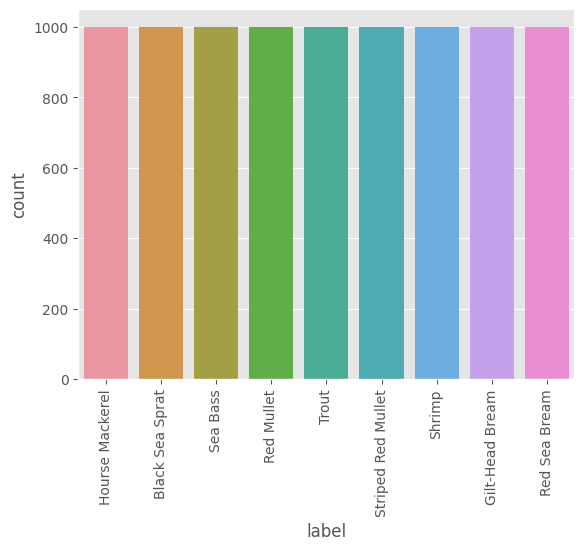

In [6]:
sns.countplot(x="label", data = df )
plt.xticks(rotation = 90)
plt.show()

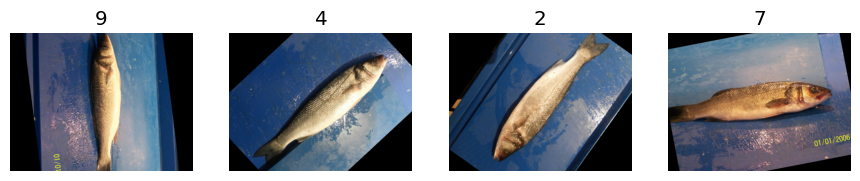

In [7]:
seabasses = df[df["label"]=="Sea Bass"]["path"].iloc[:4]
cn = 0
plt.figure(figsize=(25,25))

for sea_bass in seabasses:
    plt.subplot(int(np.sqrt(len(sea_bass))), int(np.sqrt(len(sea_bass))), cn + 1)
    plt.imshow(plt.imread(sea_bass))
    plt.title(sea_bass[-5:-4])
    plt.axis('off')
    cn+=1

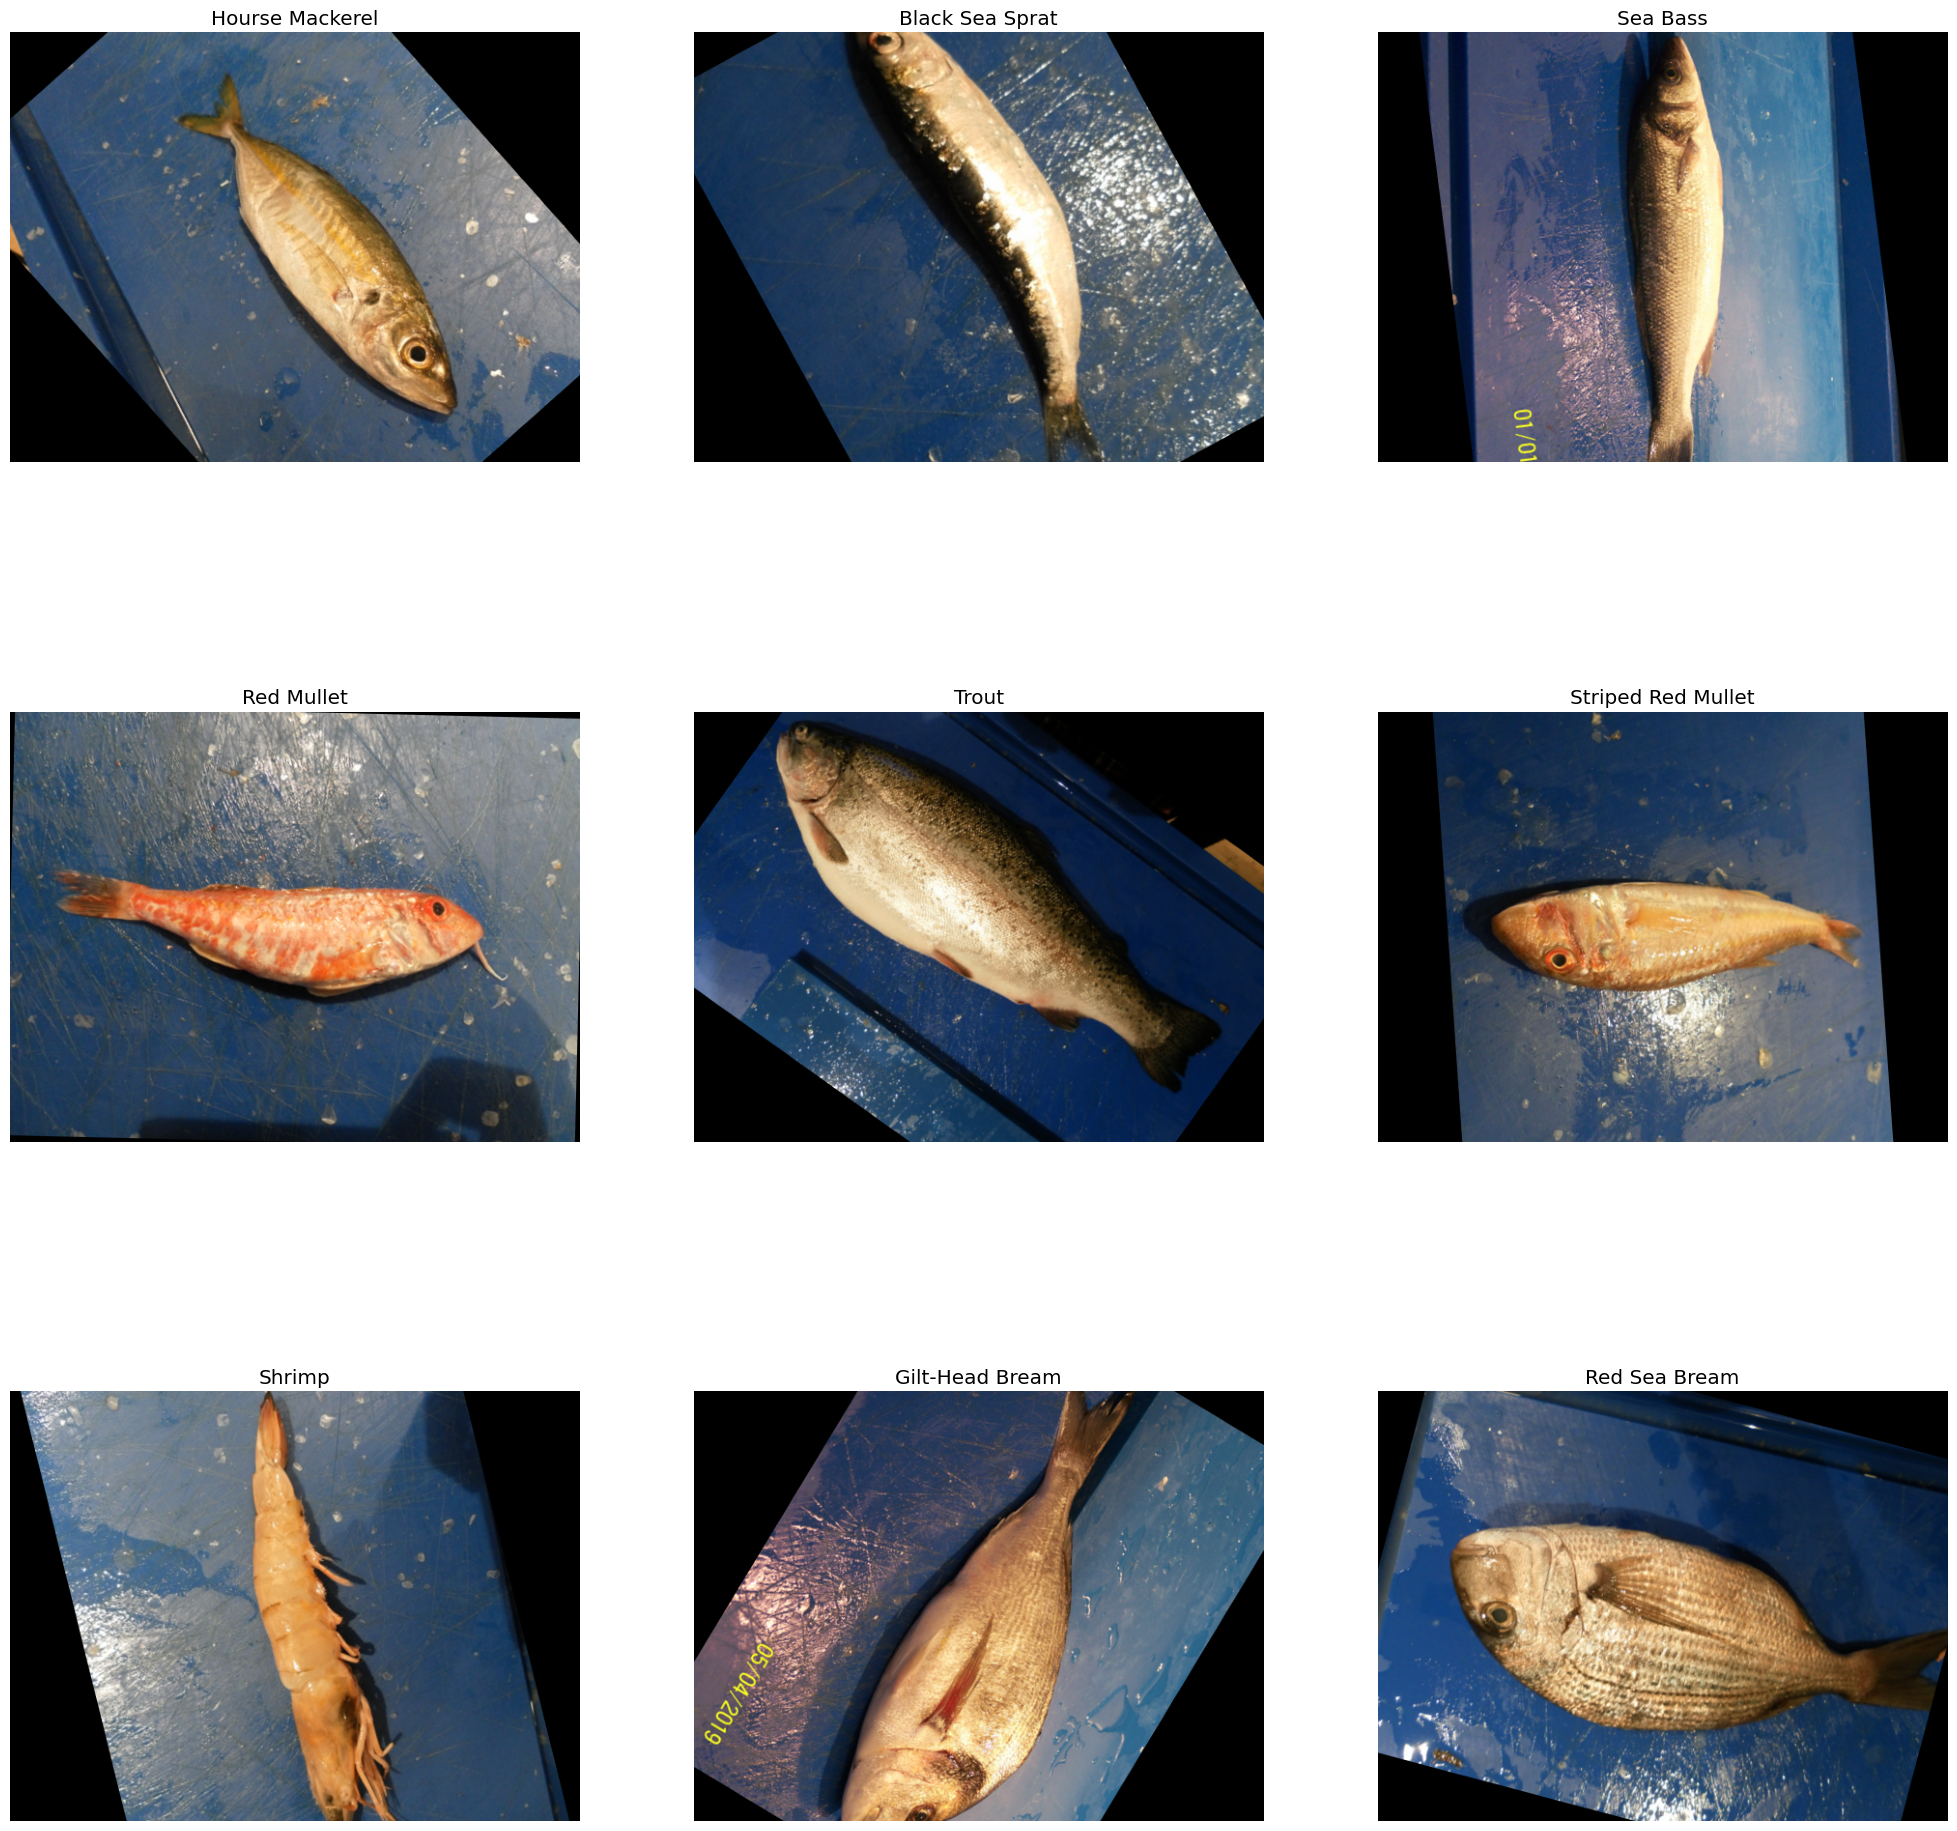

In [8]:
cn = 0

plt.figure(figsize=(25,25))

for unique_label in df["label"].unique():
    plt.subplot(3, 3, cn+1)
    plt.imshow(plt.imread(df[df["label"]==unique_label].iloc[0,0]))
    plt.title(unique_label)
    plt.axis('off')
    cn+=1